# Survey Answers After Wednesday Class

Answer choices were:
0. Strongly agree
1. Somewhat agree
2. Neither agree nor disagree
3. Somewhat disagree
4. Strongly disagree

In [1]:
import matplotlib.pyplot as plt
import random
import scipy.stats as st
import pandas as pd
import csv
import numpy as np
from math import sqrt
from numpy import mean, std

In [92]:
def findResults(a_list):
    results = []
    strongPositive = 0
    positive = 0
    neutral = 0
    negative = 0
    strongNegative = 0
    for x in a_list:
        if (x == 'Strongly agree'):
            strongPositive = strongPositive + 1
        elif (x == 'Somewhat agree'):
            positive = positive + 1
        elif (x == 'Neither agree nor disagree'):
            neutral = neutral + 1
        elif (x == 'Somewhat disagree'):
            negative = negative + 1
        elif (x == 'Strongly disagree'):
            strongNegative = strongNegative + 1
        else:
            raise Exception(x)
    return [strongPositive, positive, neutral, negative, strongNegative] 
map_result = {'Strongly agree': 2, 'Somewhat agree': 1,
            'Neither agree nor disagree': 0,
            'Somewhat disagree': -1, 'Strongly disagree': -2}
rmap = {v:k for k,v in map_result.items()}
def make_percentage(results):
    total = sum(results)
    results = [100*r/total for r in results]
    return results
def expand_frequencies(a_list):
    return [i for i,x in enumerate(a_list)
           for r in range(x)]
def classify_pvalue(pvalue):
    if pvalue < .01:
        return "Significant"
    else:
        return "Not significant"
def cohen_d(x,y):
    cohens_d = (mean(x) - mean(y)) / sqrt((std(x, ddof=1) ** 2 + std(y, ddof=1) ** 2) / 2.0)
    direction = "negative" if cohens_d < 0 else "positive"
    if abs(cohens_d) <= .2:
        return "Small "+direction
    elif abs(cohens_d) <= .5:
        return "Medium "+direction
    elif abs(cohens_d) <= .8:
        return "Large "+direction
    else:
        return "Very large "+direction

In [52]:
LIKERT_SCALE = ["Strongly Disagree", "Somewhat Disagree",
                "Neither Agree nor Disagree",
                "Somewhat Agree","Strongly Agree", ]
LIKERT_COLORS = ['white', 'red', 'pink', 'gainsboro',
                 'blue', 'darkblue']


In [19]:
wed_df = pd.read_csv('s18-Wednesday Post-class Survey-anon.csv')
responses = wed_df.iloc[:,7]
responses = responses.str.split(',', expand = True)
wed1 = responses.iloc[:,0].values
wed2 = responses.iloc[:,1].values
wed3 = responses.iloc[:,2].values
wed4 = responses.iloc[:,3].values
wed5 = responses.iloc[:,4].values

final_df = pd.read_csv('f17-Survey_ Final Survey-anon.csv')
final_responses = final_df.iloc[:,10]
final_responses = final_responses.str.split(',', expand = True)
final1 = final_responses.iloc[:,0].values
final2 = final_responses.iloc[:,1].values
final3 = final_responses.iloc[:,2].values
final4 = final_responses.iloc[:,3].values
final5 = final_responses.iloc[:,4].values

In [107]:
stacked = pd.DataFrame([make_percentage(wed), 
                            make_percentage(final)], 
                           columns=LIKERT_SCALE,
                          index=["Treatment", "Baseline"])

True
I had the opportunity to work with others (peers and TAs) to enhance my learning.: Large negative 0.46 1.18
False
Working with others during class helped me feel more prepared to start my project.: Small positive 0.91 0.7
False
othersUnderstanding: Medium positive 0.9 0.68
False
othersTools: Small negative 0.35 0.58
True
findAnswers: Large negative 0.34 0.98


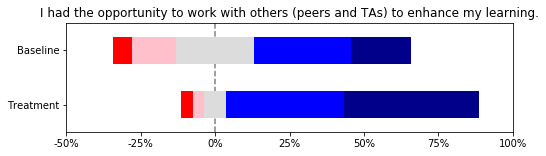

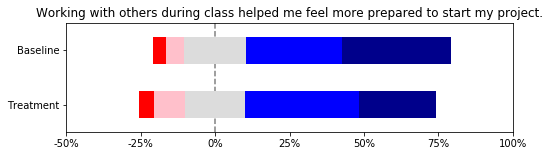

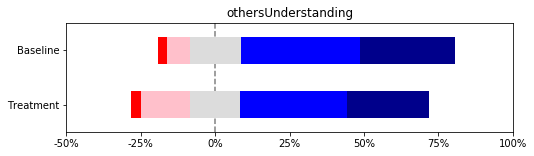

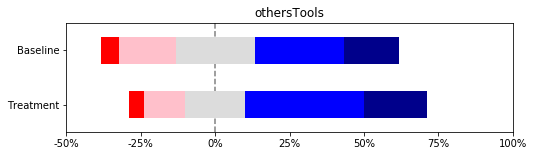

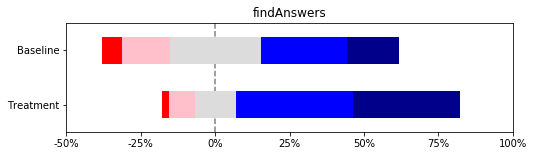

In [113]:
data = [('I had the opportunity to work with others (peers and TAs) to enhance my learning.', wed1, final1),
        ('Working with others during class helped me feel more prepared to start my project.', wed2, final2),
        ('othersUnderstanding', wed3, final3),
        ('othersTools', wed4, final4),
        ('findAnswers', wed5, final5)
       ]
for (question, wed, final) in data:
    expanded_wed = pd.Series(wed).map(map_result)
    expanded_final = pd.Series(final).map(map_result)
    wed = expanded_wed.value_counts().sort_index()
    final = expanded_final.value_counts().sort_index()
    # Statistical Test
    s, p = st.mannwhitneyu(expanded_wed, expanded_final)
    effect_size = cohen_d(expanded_final, expanded_wed)
    print(p < .01)
    print(question+":", effect_size, round(expanded_final.mean(), 2), round(expanded_wed.mean(),2))
    # Construct data
    stacked = pd.DataFrame([make_percentage(wed), 
                            make_percentage(final)], 
                           columns=LIKERT_SCALE,
                          index=["Treatment", "Baseline"])
    # Calculate offset
    middles = stacked[LIKERT_SCALE[:2]].sum(axis=1) + stacked[LIKERT_SCALE[2]]*.5
    stacked.insert(0, '', (middles - 100).abs())
    # Make Bar Graph
    stacked.plot.barh(stacked=True, color=LIKERT_COLORS,
                     figsize=(8, 2))
    # Make vertical bar
    z = plt.axvline(100, linestyle='--', color='black', alpha=.5)
    z.set_zorder(-1)
    # Add annotations
    l = plt.legend(loc=(1.1, .5))
    l.remove()
    plt.title(question)
    #plt.title(classify_pvalue(p) + " ("+ effect_size+")")
    # Fix x-axis labeling
    plt.xlim(50, 200)
    xvalues = np.arange(50,201,25)
    xlabels = [str(round(x-100))+"%" for x in xvalues]
    plt.xticks(xvalues, xlabels)
    # Show graph
    #plt.show()
    plt.savefig(question+'.png', dpi=300)

    

SpearmanrResult(correlation=0.4126581059708655, pvalue=2.2575028216896629e-10)


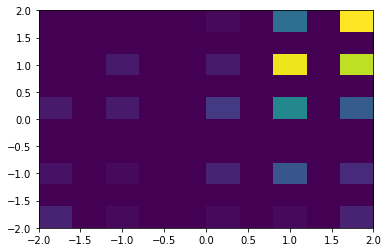

In [7]:
# Statistical Test
f1 = [map_result[f] for f in wed1]#+[map_result[f] for f in final1]
f2 = [map_result[f] for f in wed2]#+[map_result[f] for f in final2]
print(st.spearmanr(f1, f2))
plt.hist2d(f1, f2)
plt.show()